In [ ]:
#random labels

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 46437483.59it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 5272500.28it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 20984590.21it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 12802774.71it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



Test set Epoch 1, Average loss: 2.3044, Accuracy: 10.12%
Train set Epoch: 1, Loss: 2.3044, Accuracy: 9.97%
Test set Epoch 2, Average loss: 2.3045, Accuracy: 8.97%
Train set Epoch: 2, Loss: 2.3031, Accuracy: 10.08%
Test set Epoch 3, Average loss: 2.3036, Accuracy: 9.15%
Train set Epoch: 3, Loss: 2.3029, Accuracy: 10.27%
Test set Epoch 4, Average loss: 2.3042, Accuracy: 8.17%
Train set Epoch: 4, Loss: 2.3027, Accuracy: 10.20%
Test set Epoch 5, Average loss: 2.3043, Accuracy: 6.68%
Train set Epoch: 5, Loss: 2.3025, Accuracy: 10.21%
Test set Epoch 6, Average loss: 2.3047, Accuracy: 7.46%
Train set Epoch: 6, Loss: 2.3024, Accuracy: 10.45%
Test set Epoch 7, Average loss: 2.3049, Accuracy: 6.57%
Train set Epoch: 7, Loss: 2.3024, Accuracy: 10.34%
Test set Epoch 8, Average loss: 2.3057, Accuracy: 7.09%
Train set Epoch: 8, Loss: 2.3023, Accuracy: 10.47%
Test set Epoch 9, Average loss: 2.3045, Accuracy: 10.40%
Train set Epoch: 9, Loss: 2.3023, Accuracy: 10.16%
Test set Epoch 10, Average loss: 2.

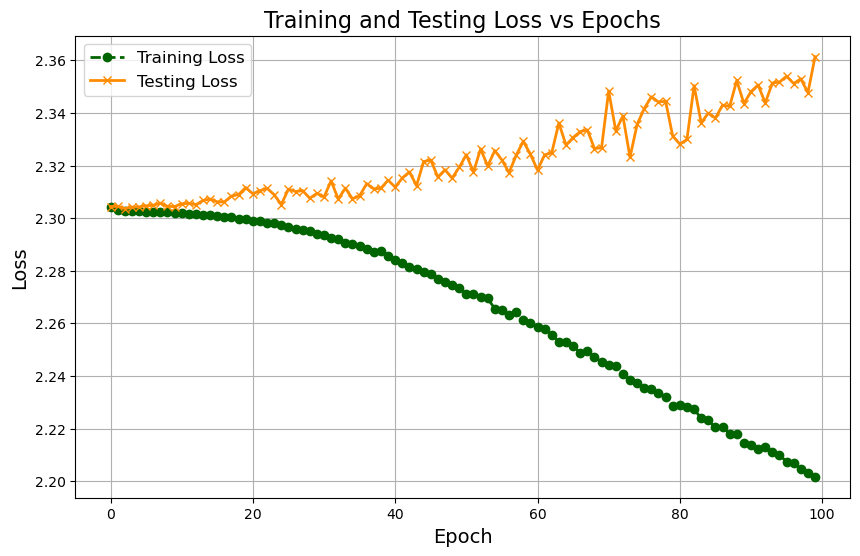

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

torch.manual_seed(1)

# Data loader function
def load_data(training_batch_size, test_batch_size):
    train_dataset = datasets.MNIST('data', train=True, download=True,
                transform=transforms.Compose([
                    transforms.Resize((32, 32)),
                    transforms.ToTensor(),
                    transforms.Normalize((0.1180,), (0.2987,))
                ]))
    random_labels = torch.tensor(np.random.randint(0, 10, len(train_dataset), dtype=np.int64))
    train_dataset.targets = random_labels

    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=training_batch_size, shuffle=True)

    test_dataset = datasets.MNIST('data', train=False,
                transform=transforms.Compose([
                    transforms.Resize((32, 32)),
                    transforms.ToTensor(),
                    transforms.Normalize((0.1180,), (0.2987,))  
                ]))
    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=test_batch_size, shuffle=True)

    return train_loader, test_loader

# Modified model with Dropout layers
class ModifiedConvNet(nn.Module):
    def __init__(self, dropout_prob=0.5):
        super(ModifiedConvNet, self).__init__()
        self.conv1_layer = nn.Conv2d(1, 6, 5)
        self.conv2_layer = nn.Conv2d(6, 16, 5)
        self.fc1_layer = nn.Linear(16 * 5 * 5, 120)
        self.fc2_layer = nn.Linear(120, 84)
        self.fc3_layer = nn.Linear(84, 10)
        self.dropout_layer = nn.Dropout(p=dropout_prob)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1_layer(x)), 2)
        x = F.max_pool2d(F.relu(self.conv2_layer(x)), 2)
        x = x.view(x.size()[0], -1)
        x = F.relu(self.fc1_layer(x))
        x = self.dropout_layer(x)
        x = F.relu(self.fc2_layer(x))
        x = self.dropout_layer(x)
        x = self.fc3_layer(x)
        return x

# Training function
def train_model(model, optimizer, train_data_loader, loss_function):
    model.train()
    correct_predictions = 0
    total_loss = 0

    for batch_idx, (data, target) in enumerate(train_data_loader):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = model(data)
        loss = loss_function(output, target)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        predictions = np.argmax(output.data, axis=1)
        correct_predictions += np.equal(predictions, target.data).sum()

    total_loss = (total_loss * 100) / len(train_data_loader.dataset)
    accuracy = 100.0 * correct_predictions / len(train_data_loader.dataset)
    return total_loss, accuracy

# Evaluation function
def evaluate_model(model, epoch, test_data_loader, loss_function):
    model.eval()
    total_loss = 0
    correct_predictions = 0

    for data, target in test_data_loader:
        data, target = Variable(data), Variable(target)
        output = model(data)
        loss = loss_function(output, target)
        total_loss += loss.item()

        predictions = np.argmax(output.data, axis=1)
        correct_predictions += np.equal(predictions, target.data).sum()

    total_loss = (total_loss * 100) / len(test_data_loader.dataset)
    accuracy = 100.0 * correct_predictions / len(test_data_loader.dataset)
    print(f'Test set Epoch {epoch}, Average loss: {total_loss:.4f}, Accuracy: {accuracy:.2f}%')
    return total_loss

# Set batch sizes
training_batch_size = 100
test_batch_size = 100

# Load data
training_data_loader, test_data_loader = load_data(training_batch_size, test_batch_size)

# Initialize model and optimizer
modified_model = ModifiedConvNet()
optimizer = optim.Adam(modified_model.parameters(), lr=0.0001)

train_loss_array = []
test_loss_array = []

# Set number of epochs
epochs = 100
loss_function = torch.nn.CrossEntropyLoss()

# Train and evaluate for each epoch
for epoch in range(1, epochs + 1):
    tr_loss, acc = train_model(modified_model, optimizer, training_data_loader, loss_function)
    train_loss_array.append(tr_loss)
    loss_test = evaluate_model(modified_model, epoch, test_data_loader, loss_function)
    test_loss_array.append(loss_test)
    print(f'Train set Epoch: {epoch}, Loss: {tr_loss:.4f}, Accuracy: {acc:.2f}%')

# Plot results with modified style
plt.figure(figsize=(10, 6))
plt.plot(np.arange(0, 100, 1), train_loss_array, linestyle='--', linewidth=2, color="darkgreen", marker='o')
plt.plot(np.arange(0, 100, 1), test_loss_array, linestyle='-', linewidth=2, color="darkorange", marker='x')
plt.title('Training and Testing Loss vs Epochs', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.grid(True)
plt.legend(['Training Loss', 'Testing Loss'], fontsize=12)
plt.show()
